# Model Develoment

### importing all the neede Libaries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

#### constants

In [52]:
cleaned_data_path = '../data/cleaned_data.csv'
transformed_data_path = '../data/transformed_data.csv'

## Loading the Data Set

In [53]:
df = pd.read_csv(cleaned_data_path)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


## Data Processing/Transformation

#### transforming the gender to numerical two columns 

In [54]:
# transforming the gender to numerical two columns 
dummies  = pd.get_dummies(df['gender'])
df = pd.concat([df,dummies],axis=1)
df.drop(['gender'],axis=1,inplace=True)
df.head()

,age,bmi,no_of_children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92,True,False
1,18,33.770,1,no,southeast,1725.55,False,True
2,28,33.000,3,no,southeast,4449.46,False,True
3,33,22.705,0,no,northwest,21984.47,False,True
4,32,28.880,0,no,northwest,3866.86,False,True


In [55]:
df.replace('northwest', 1, inplace=True)
df.replace('northeast', 2, inplace=True)
df.replace('southwest', 3, inplace=True)
df.replace('southeast', 4, inplace=True)

C:\Users\imadb\AppData\Local\Temp\ipykernel_31408\1664779204.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('southeast', 4, inplace=True)


In [56]:
df.replace("yes",1,inplace=True)
df.replace("no",0,inplace=True)

C:\Users\imadb\AppData\Local\Temp\ipykernel_31408\3982548934.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("no",0,inplace=True)


## saving the transformed data frame

In [57]:
df.to_csv(transformed_data_path, index=False )

## Loading Transformed data

## initiltise the Liner Regression Model

In [58]:
lm = LinearRegression()
x = df[['smoker']]
y = df['charges']
lm.fit(x, y)
yhat = lm.predict(x)
print('R2:', r2_score(y, yhat))
print('MSE:', mean_squared_error(y, yhat))

R2: 0.6221791733924185
MSE: 55770970.49293007


**R² score of 0.62 (62%)** means that **62% of the variation in insurance charges can be explained by the "smoker" feature alone**.

🚀 **Interpretation:**  
- This suggests that whether a person is a smoker or not **has a strong influence** on insurance charges.  
- However, **38% of the variation** is still unexplained, meaning other factors (like age, BMI, etc.) also play a role.  


Fiting a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. we should see an improvement in the performance.

In [59]:
x = df[['age','male','female', 'bmi', 'no_of_children', 'smoker', 'region']]
y = df['charges']
lm.fit(x, y)
yhat = lm.predict(x)
print('R2:', r2_score(y, yhat))
print('MSE:', mean_squared_error(y, yhat))
# df.columns

R2: 0.7504083820289634
MSE: 36842772.50180054


  Since we're using **multiple features** (`age`, `male`, `female`, `bmi`, etc.) to predict `charges`, this qualifies as **Multiple Linier Regression**.  

### **Interpretation of R² = 75%**
- **75% of the variation** in insurance charges is explained by these features.  
- **25% is unexplained**, meaning some other factors not in our model may still influence the charges.  

 



**we can not also that MSE error is a less and the previos MSE when we used only the smoker attribute**


## using cross validation


In [60]:
## using cross validation
# Perform cross-validation
scores = cross_val_score(lm, x, y, cv=5)
print('Cross-Validation Scores:', scores)
print('Mean Cross-Validation Score:', np.mean(scores))

# Perform cross-validation prediction
y_pred = cross_val_predict(lm, x, y, cv=5)
print('Cross-Validation R2 Score:', r2_score(y, y_pred))
print('Cross-Validation MSE:', mean_squared_error(y, y_pred))

Cross-Validation Scores: [0.73826314 0.75690927 0.76330761 0.74545018 0.74325342]
Mean Cross-Validation Score: 0.7494367215412645
Cross-Validation R2 Score: 0.7496968706021572
Cross-Validation MSE: 36947800.28215371


### **Cross-Validation Insights**

 **Model Stability**: The mean cross-validation R² score (74.9%) is **consistent** with the original R² (~75%), meaning the model generalizes well.  

 **Slight Drop**: The cross-validation score is a bit lower than the training R², which is **expected**—this prevents overfitting.  

 **Model Performance**: The model explains **~75% of the variance** in insurance charges, but **25% remains unexplained**, suggesting other influential factors might be missing.  



## Polynomial Regression

#### choosing the best order

shape :  (2772, 8)
R^2 :  0.7504083820289634
MSE :  36842772.50180054
_____________________________
shape :  (2772, 36)
R^2 :  0.8168060981340476
MSE :  27041658.309806217
_____________________________
shape :  (2772, 120)
R^2 :  0.8545412792122198
MSE :  21471484.50718005
_____________________________
shape :  (2772, 330)
R^2 :  0.7512396655226462
MSE :  36720064.900915444
_____________________________
shape :  (2772, 792)
R^2 :  0.8869190413510677
MSE :  16692131.200782511
_____________________________


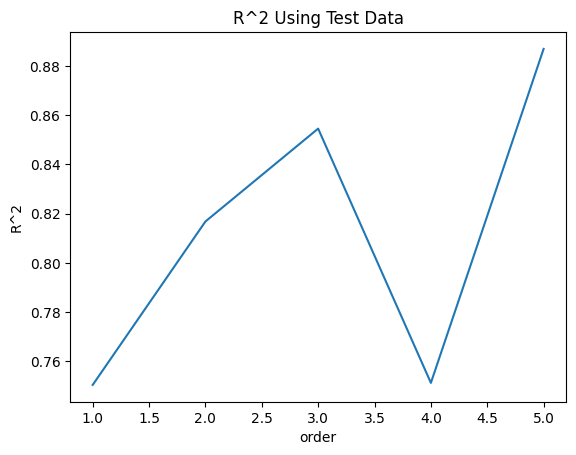

Best R^2 is 0.8869190413510677 
 with order 5 
 and mse 16692131.200782511


In [61]:
lre = LinearRegression()
r_scores = []
mses = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_pr = pr.fit_transform(x)
    lre.fit(x_pr, y)
    r_scores.append(lre.score(x_pr, y))
    mses.append(mean_squared_error(y, lre.predict(x_pr)))
    print("shape : ", x_pr.shape)
    print("R^2 : ", lre.score(x_pr, y))
    print("MSE : ", mean_squared_error(y, lre.predict(x_pr)))
    print("_____________________________")
plt.plot(order, r_scores)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()
max_mse = max(mses)
max_r2 = max(r_scores)
print(f"Best R^2 is {max_r2} \n with order {order[r_scores.index(max(r_scores))]} \n and mse {mses[r_scores.index(max(r_scores))]}")

### Splitiing the data 'Random Split' 

In [62]:
# Splitiing the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


## finding the best order for the polynomial regression of the training data

Degree: 1
Shape: (2217, 8)
R² (Train): 0.7511
R² (test): 0.7470
MSE (Train): 36645123.9327
MSE (Test): 37707135.9329
_____________________________


Degree: 2
Shape: (2217, 36)
R² (Train): 0.8460
R² (test): 0.8410
MSE (Train): 22671151.8523
MSE (Test): 23700278.1686
_____________________________
Degree: 3
Shape: (2217, 120)
R² (Train): 0.8122
R² (test): 0.7872
MSE (Train): 27649855.7127
MSE (Test): 31712467.5621
_____________________________
Degree: 4
Shape: (2217, 330)
R² (Train): 0.8701
R² (test): 0.8453
MSE (Train): 19117339.7850
MSE (Test): 23049700.6208
_____________________________
Degree: 5
Shape: (2217, 792)
R² (Train): 0.8906
R² (test): 0.8423
MSE (Train): 16101529.1812
MSE (Test): 23505099.0857
_____________________________


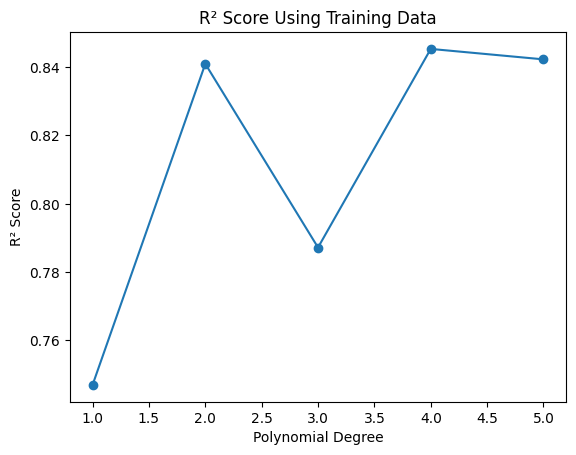

Best R²: 0.8453 at degree 4
Best MSE (Test): 23049700.6208 at degree 4


In [63]:
r_scores = []
mses = []
order = [1, 2, 3, 4, 5]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.transform(x_test)  # FIXED: Use transform instead of fit_transform

    lre = LinearRegression()
    lre.fit(x_train_pr, y_train)

    r2_score_train = lre.score(x_train_pr, y_train)
    r2_score_test = lre.score(x_test_pr, y_test)
    mse_train = mean_squared_error(y_train, lre.predict(x_train_pr))
    mse_test = mean_squared_error(y_test, lre.predict(x_test_pr))  # FIXED: Use y_test

    r_scores.append(r2_score_test)
    mses.append(mse_test)  # FIXED: Store test MSE

    print(f"Degree: {n}")
    print(f"Shape: {x_train_pr.shape}")
    print(f"R² (Train): {r2_score_train:.4f}")
    print(f"R² (test): {r2_score_test:.4f}")
    print(f"MSE (Train): {mse_train:.4f}")
    print(f"MSE (Test): {mse_test:.4f}")
    print("_____________________________")

# Plot R² scores
plt.plot(order, r_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score Using Training Data')
plt.show()

# Get best R² and corresponding polynomial degree
best_r2 = max(r_scores)
best_degree = order[r_scores.index(best_r2)]
best_mse = min(mses)

print(f"Best R²: {best_r2:.4f} at degree {best_degree}")
print(f"Best MSE (Test): {best_mse:.4f} at degree {order[mses.index(best_mse)]}")

#### Running the Polynomail model on train data and test it using test data 

we know that the order 5 is the best order for the polynomial regression, so we will use it to train the model


R2: 0.8453353464577109
MSE: 23049700.62080398


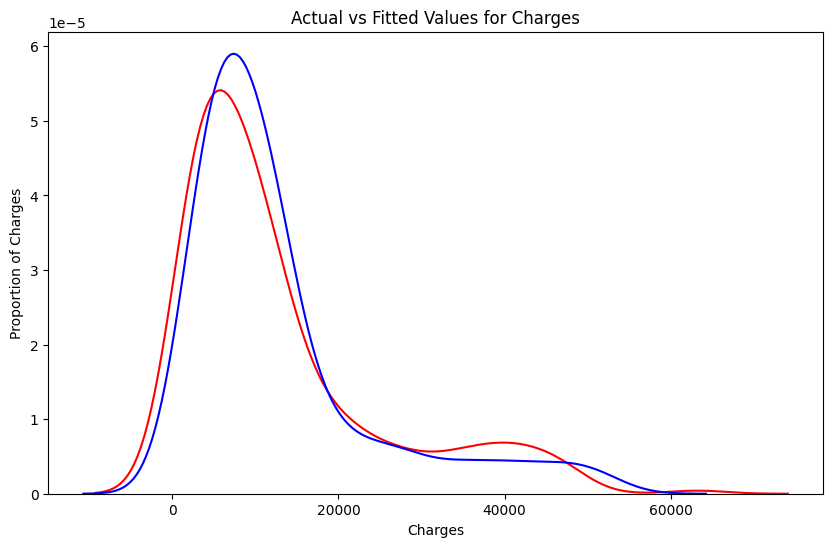

In [64]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
lre.fit(x_train_pr, y_train)
yhat = lre.predict(x_test_pr)
print('R2:', r2_score(y_test, yhat))
print('MSE:', mean_squared_error(y_test, yhat))
# ploting distribution of the predicted values
plt.figure(figsize=(10, 6))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Proportion of Charges')
plt.show()


The **y-axis is the proportion (density) of occurrences of a charge value**, not actual count. It helps see **how common certain charges are** in the dataset. 

Our polynomial regression model (degree = 5) provides a good fit for the data, as the predicted and actual distributions are closely aligned. Since we evaluated the model using both training and testing data, the similarity of the graphs indicates a reliable performance. 

## To further enhance the model's robustness, we will apply cross-validation.  

choosing best order for cross validation

R^2 :  0.7864106338577119
_____________________________
R^2 :  0.7957018492256593
_____________________________
R^2 :  0.8182205886002396
_____________________________
R^2 :  0.8128541229237253
_____________________________
R^2 :  0.8275523576803953
_____________________________


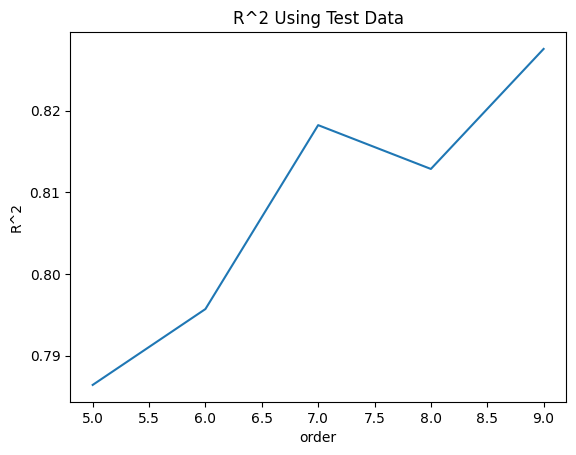

Best R^2 is 0.8275523576803953 
 with order 9 
 


In [65]:
r_scores = []
order = range(5, 10)
for n in order:
    scores = cross_val_score(lre, x_train, y_train, cv=n)
    r_scores.append(max(scores))
    
    print("R^2 : ",max(scores))
    print("_____________________________")
plt.plot(order, r_scores)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()
max_r2 = max(r_scores)
print(f"Best R^2 is {max_r2} \n with order {order[r_scores.index(max(r_scores))]} \n ")


## we will try to use cross validation with polynomial regression

Degree 1: shape((2217, 8)) -> 0.7481701429366291
Degree 2: shape((2217, 36)) -> 0.8343958512529092
Degree 3: shape((2217, 120)) -> 0.7886146926651698
Degree 4: shape((2217, 330)) -> 0.8332916880626969
Degree 5: shape((2217, 792)) -> 0.7703532421396014
breaking in degree 6 due to negative R² scores: [ -2.94249216  -1.10039011 -47.88564884 -14.66126853 -30.47691898]


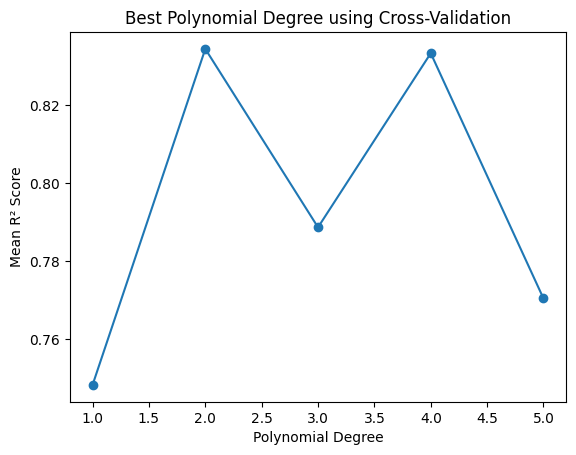

Best Degree: 2 with R² score 0.8343958512529092
Best polynomial degree: 2 with R²: 0.8344
R2: 0.840969938304171
MSE: 23700278.168564092


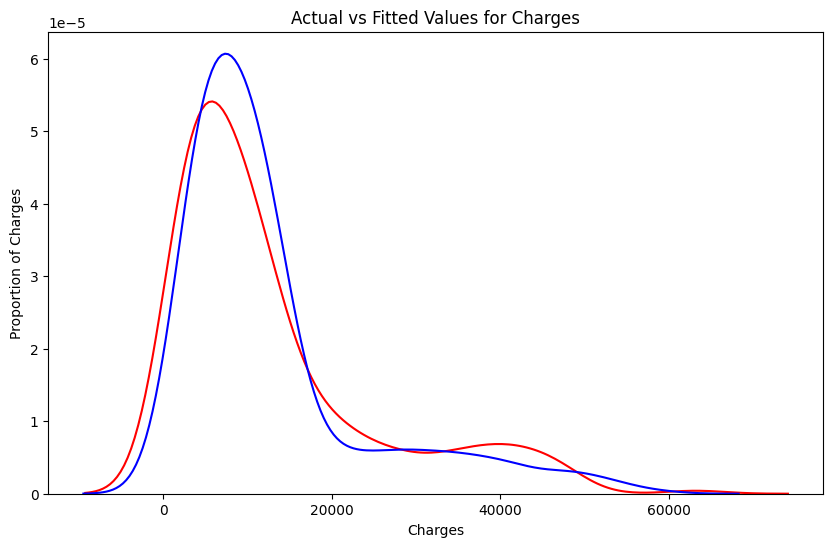

In [66]:
r_scores = []
degrees = range(1, 10)  # Test polynomial degrees from 1 to 10
cv_folds = 5  # Use 5-fold cross-validation

for d in degrees:
    pr = PolynomialFeatures(degree=d)
    x_train_poly = pr.fit_transform(x_train)  # Transform features
    lre = LinearRegression()
    
    scores = cross_val_score(lre, x_train_poly, y_train, cv=cv_folds, scoring='r2')
    
    if np.any(scores < 0):
        print(f"breaking in degree {d} due to negative R² scores: {scores}")
        break  # Skip appending for this degree
    
    r_scores.append(np.mean(scores))  # Store the average R² score
    print(f"Degree {d}: shape({x_train_poly.shape}) -> {np.mean(scores)}")

# Ensure we have at least one valid score before plotting
if r_scores:
    plt.plot(degrees[:len(r_scores)], r_scores, marker='o')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean R² Score')
    plt.title('Best Polynomial Degree using Cross-Validation')
    plt.show()

    # Get the best polynomial degree
    best_degree = degrees[np.argmax(r_scores)]
    best_r2 = max(r_scores)
    print(f"Best Degree: {best_degree} with R² score {best_r2}")
else:
    print("No valid polynomial degree found (all had negative R² scores).")


print(f"Best polynomial degree: {best_degree} with R²: {best_r2:.4f}")
# ploting the distribution of the predicted values
pr = PolynomialFeatures(degree=best_degree)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
lre.fit(x_train_pr, y_train)
yhat = lre.predict(x_test_pr)
print('R2:', r2_score(y_test, yhat))
print('MSE:', mean_squared_error(y_test, yhat))
plt.figure(figsize=(10, 6))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Proportion of Charges')
plt.show()


## integrating both approaches:
 - Finding the best polynomial degree
 - Finding the best number of cross-validation folds (k)


Testing for k = 5 folds...

Degree 1: shape (2217, 8) R² -> 0.7482
Degree 2: shape (2217, 36) R² -> 0.8344
Degree 3: shape (2217, 120) R² -> 0.7886
Degree 4: shape (2217, 330) R² -> 0.8333
Degree 5: shape (2217, 792) R² -> 0.7704
Best for k=5: Degree 2 and shape (2217, 792) with R² = 0.8344

Testing for k = 6 folds...

Degree 1: shape (2217, 8) R² -> 0.7485
Degree 2: shape (2217, 36) R² -> 0.8410
Degree 3: shape (2217, 120) R² -> 0.7963
Degree 4: shape (2217, 330) R² -> 0.8340
Degree 5: shape (2217, 792) R² -> 0.7811
Best for k=6: Degree 2 and shape (2217, 792) with R² = 0.8410

Testing for k = 7 folds...

Degree 1: shape (2217, 8) R² -> 0.7469
Degree 2: shape (2217, 36) R² -> 0.8228
Degree 3: shape (2217, 120) R² -> 0.8062
Degree 4: shape (2217, 330) R² -> 0.8353
Degree 5: shape (2217, 792) R² -> 0.7639
Best for k=7: Degree 4 and shape (2217, 792) with R² = 0.8353

Testing for k = 8 folds...

Degree 1: shape (2217, 8) R² -> 0.7492
Degree 2: shape (2217, 36) R² -> 0.8384
Degree 3: sha

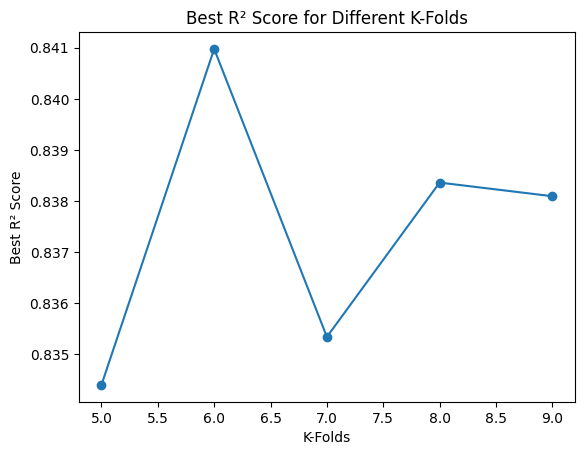


Final Best Choice: k=6, Degree=2 with R² = 0.8410
R2: 0.840969938304171
MSE: 23700278.168564092


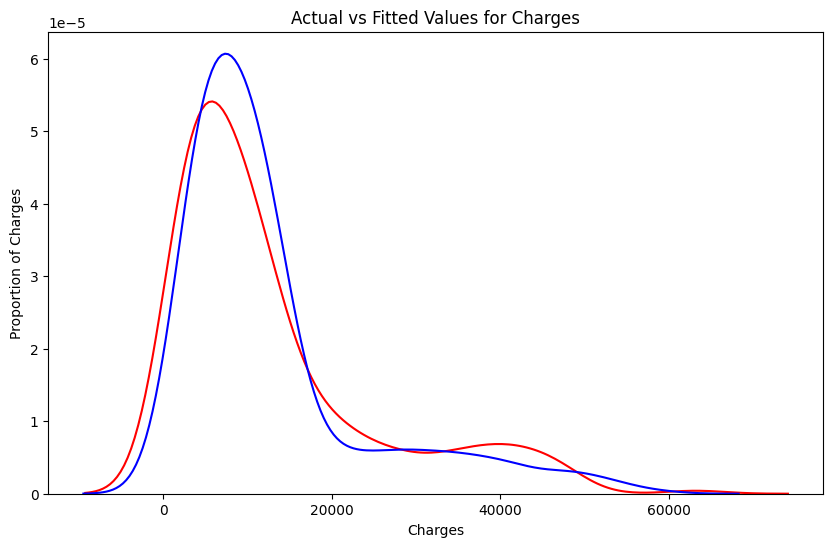

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

best_results = []  # Store the best results for each k

orders = range(5, 10)  # K-fold values to test
degrees = range(1, 6)  # Polynomial degrees to test

for k in orders:
    print(f"\nTesting for k = {k} folds...\n")
    r_scores = []
    
    for d in degrees:
        pr = PolynomialFeatures(degree=d)
        x_train_poly = pr.fit_transform(x_train)  # Transform features
        lre = LinearRegression()
        
        scores = cross_val_score(lre, x_train_poly, y_train, cv=k, scoring='r2')

        if np.any(scores < 0):  
            print(f"breaking in degree {d} for k={k} due to negative R² scores: {scores}")
            break  # Skip this degree
        
        mean_r2 = np.mean(scores)
        r_scores.append((d, mean_r2))  # Store (degree, R² score)
        print(f"Degree {d}: shape {x_train_poly.shape} R² -> {mean_r2:.4f}")

    if r_scores:
        best_degree, best_r2 = max(r_scores, key=lambda x: x[1])  # Get best degree for current k
        best_results.append((k, best_degree, best_r2))  # Store best results
        print(f"Best for k={k}: Degree {best_degree} and shape {x_train_poly.shape} with R² = {best_r2:.4f}")
    else:
        print(f"No valid polynomial degree found for k={k} (all had negative R² scores).")

# Find the overall best (k, degree) combination
if best_results:
    best_k, best_degree, best_r2 = max(best_results, key=lambda x: x[2])

    # Plot results
    plt.plot([k for k, _, _ in best_results], [r2 for _, _, r2 in best_results], marker='o')
    plt.xlabel('K-Folds')
    plt.ylabel('Best R² Score')
    plt.title('Best R² Score for Different K-Folds')
    plt.show()

    print(f"\nFinal Best Choice: k={best_k}, Degree={best_degree} with R² = {best_r2:.4f}")
else:
    print("No valid polynomial degree and k combination found.")
# ploting the distribution of the predicted values
pr = PolynomialFeatures(degree=best_degree)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
lre.fit(x_train_pr, y_train)
yhat = lre.predict(x_test_pr)
print('R2:', r2_score(y_test, yhat))
print('MSE:', mean_squared_error(y_test, yhat))
plt.figure(figsize=(10, 6))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Proportion of Charges')
plt.show()


## Hyper-params tuning using Piplines (grid search + ridge regression + cv)

applying ridge regression by finding the best k-fold and the best alpha 


Testing for k = 5 folds...

Best for k=5: alpha=0.6154545454545455, fit_intercept=False, R²=0.8403
_____________________________

Testing for k = 6 folds...

Best for k=6: alpha=0.7163636363636363, fit_intercept=False, R²=0.8410
_____________________________

Testing for k = 7 folds...

Best for k=7: alpha=1.019090909090909, fit_intercept=False, R²=0.8402
_____________________________

Testing for k = 8 folds...

Best for k=8: alpha=0.9181818181818182, fit_intercept=False, R²=0.8420
_____________________________

Testing for k = 9 folds...

Best for k=9: alpha=0.9181818181818182, fit_intercept=False, R²=0.8385
_____________________________


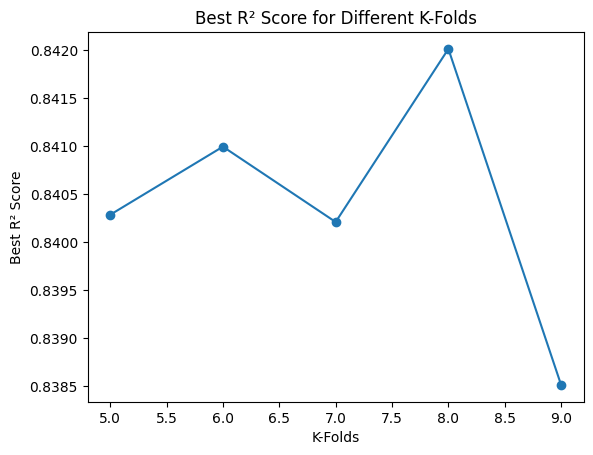


Final Best Selection:
Best k: 8
Best alpha: 0.9181818181818182
Best fit_intercept: False
Best R² score: 0.842014035572448
Best k: 8.0000
Final Model Evaluation:
R2: 0.8413
MSE: 23649130.1001


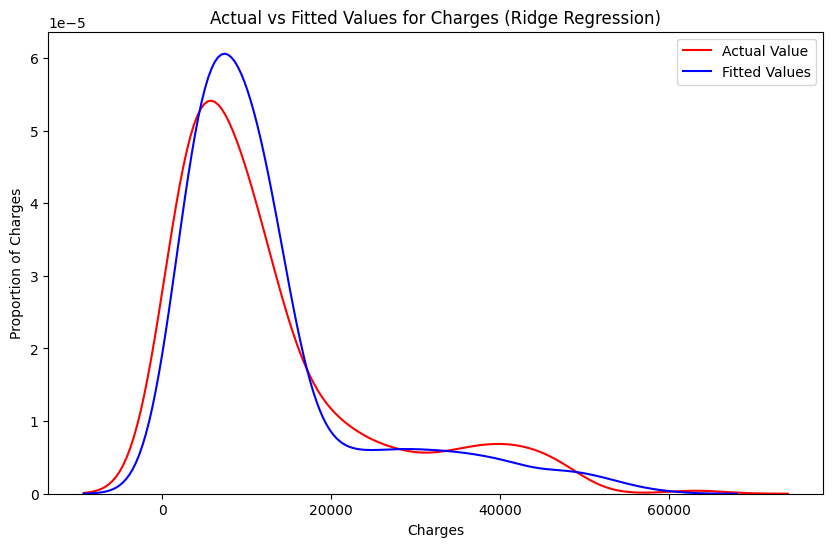

In [68]:
# Define possible values for k (K-Folds) and alpha (regularization)
k_values = range(5,10)  # Different K values to test
alphas = alphas = np.linspace(0.01, 10, num=100)  # Different alpha values for Ridge Regression

# Set the best polynomial degree from previous testing
# we know it is 2 from the previos code 
best_degree = 2

# Store results for different k values
best_results = []

best_k = None
for k in k_values:
    print(f"\nTesting for k = {k} folds...\n")

    # Define Ridge regression model
    ridge = Ridge()

    # Define the pipeline (Polynomial Features + Ridge)
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=best_degree)),
        ('ridge', ridge)
    ])

    # Define the hyperparameter grid
    param_grid = {
        'ridge__alpha': alphas,
        'ridge__fit_intercept': [True, False]
    }

    # Perform GridSearchCV to find best alpha and fit_intercept
    grid_search = GridSearchCV(pipeline, param_grid, cv=k, scoring='r2')
    grid_search.fit(x_train, y_train)

    # Extract best parameters
    best_alpha = grid_search.best_params_['ridge__alpha']
    best_fit_intercept = grid_search.best_params_['ridge__fit_intercept']
    best_r2 = grid_search.best_score_

    # Store the results
    best_results.append((k, best_alpha, best_fit_intercept, best_r2))
    print(f"Best for k={k}: alpha={best_alpha}, fit_intercept={best_fit_intercept}, R²={best_r2:.4f}")
    best_k = k
    
    print("_____________________________")
#ploting the rscore
plt.plot([k for k, _, _, _ in best_results], [r2 for _, _, _, r2 in best_results], marker='o')
plt.xlabel('K-Folds')
plt.ylabel('Best R² Score')
plt.title('Best R² Score for Different K-Folds')
plt.show()

# Find the overall best k and alpha
best_k, best_alpha, best_fit_intercept, best_r2 = max(best_results, key=lambda x: x[3])

print("\nFinal Best Selection:")
print(f"Best k: {best_k}")
print(f"Best alpha: {best_alpha}")
print(f"Best fit_intercept: {best_fit_intercept}")
print(f"Best R² score: {best_r2}")
print(f"Best k: {best_k:.4f}")

# Train the final Ridge model with the best parameters
ridge_final = Ridge(alpha=best_alpha, fit_intercept=best_fit_intercept)
pr = PolynomialFeatures(degree=best_degree)
x_train_poly = pr.fit_transform(x_train)
x_test_poly = pr.transform(x_test)

ridge_final.fit(x_train_poly, y_train)

# Predict and evaluate
yhat_ridge = ridge_final.predict(x_test_poly)
print('Final Model Evaluation:')
print(f'R2: {r2_score(y_test, yhat_ridge):.4f}')
print(f'MSE: {mean_squared_error(y_test, yhat_ridge):.4f}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat_ridge, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Charges (Ridge Regression)')
plt.xlabel('Charges')
plt.ylabel('Proportion of Charges')
plt.legend()
plt.show()


## Exporting the Model

In [69]:
import joblib

# Save the trained Ridge model
model_path = "../outputs/final_model.pkl"
joblib.dump(ridge_final, model_path)

# Save the PolynomialFeatures transformer
transformer_path = "../outputs/polynomial_transformer.pkl"
joblib.dump(pr, transformer_path)

print("Model and transformer saved successfully!")


Model and transformer saved successfully!


In [70]:
import joblib
distination = "../outputs/final_model.pkl"
joblib.dump(grid_search, distination)


['../outputs/final_model.pkl']

The **.pkl file is not storing the data**; it’s just saving the **trained model parameters**, which include:  

 **Coefficients (weights)** – The learned relationships between features and the target.  
 **Intercept (epsilon)** – The bias term in the regression equation.  
 **Polynomial Transformation (if applied)** – The fitted transformations, so new data gets processed the same way.  

Since the model only needs these numbers to make predictions, the `.pkl` file is tiny compared to the dataset. It doesn’t store the actual training data, just the **mathematical representation** of what it learned.